In [5]:
import os
import getpass
os.environ["LANGCHAIN_TRACING_V2"] = "True"
os.environ["OPENAI_API_KEY"] = getpass.getpass("your API KEY")
os.environ["LANGCHAIN_API_KEY"] = getpass.getpass("Your API KEY")

In [2]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages
from langchain_core.messages import BaseMessage
from langgraph.prebuilt import ToolNode, tools_condition

class State(TypedDict):
    messages: Annotated[list,add_messages]
graph_builder=StateGraph(State)

In [3]:
from langchain_openai import ChatOpenAI

In [ ]:
class Runnable:
    def __init__(self, func):
        self.func = func

    def __or__(self, other):
        def chained_func(*args, **kwargs):
            # the other func consumes the result of this func
            return other(self.func(*args, **kwargs))
        return Runnable(chained_func)

    def __call__(self, *args, **kwargs):
        return self.func(*args, **kwargs)

In [4]:
chatllm = ChatOpenAI(model = 'gpt-4-turbo')

In [5]:
# now the graph knows 2 things:  every node we define will receive the current state as input and return a value that updates that state. messages will be appended to the current list rather 
# our node is basically regular python functions, representing units of work

def chatbot(state:State):
    return{
        "messages":[chatllm.invoke(state["messages"])]
    }
graph_builder.add_node("chatbot",chatbot)

In [ ]:

# notice how this chatbot takes the current State as input and returns an updated messages list.This is the basic pattern for all langgraph node functions

graph_builder.set_entry_point("chatbot")
graph_builder.set_finish_point("chatbot")
# this entry point tells the graph where to start its work each time we run it. 

graph = graph_builder.compile()

In [6]:
from IPython.display import Image, display
try: 
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [ ]:
'''
while True:
    user_input ="User: what's langgraph all about?"
    if user_input.lower() in ["quit", "exit", "q"]:
        print("Goodbye!")
        break
    for event in graph.stream({"messages": ("user", user_input)}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)
'''

In [7]:
os.environ["TAVILY_API_KEY"] ="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"

In [8]:
# now let's give some tools to the graph

from langchain_community.tools.tavily_search import TavilySearchResults

tool = TavilySearchResults(max_results=2)
tools = [tool]


In [9]:
llm_with_tools = chatllm.bind_tools(tools)

In [10]:
tool_node = ToolNode(tools)
graph_builder.add_node("tools", tool_node)


In [11]:
graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)
graph_builder.add_edge("tools","chatbot")
graph_builder.set_entry_point("chatbot")
graph = graph_builder.compile()

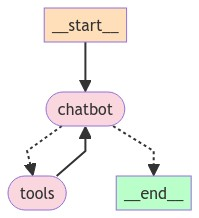

In [12]:
try: 
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [13]:
while True:
    user_input = "what is langgraph all about"
    if user_input.lower() in ["quit","exit","q"]:
        print("Goodbye!")
        break
    for event in graph.stream({
        "messages":[("user",user_input)]
    }):
        for value in event.values():
            if isinstance(value["messages"][-1],BaseMessage):
                print("Assistant:",value["messages"][-1].content)

Assistant: As of my last update in January 2023, "LangGraph" does not refer to a widely recognized concept, tool, or technology specifically related to any particular field such as linguistics, computer science, or data visualization. It's possible that "LangGraph" could be a term used in a niche area, a newly developed tool, or a concept from a specific study or paper that has not gained broader recognition.

If "LangGraph" refers to a new development or a specific project, I would need more context or details to provide an accurate explanation or description. However, if you are referring to the general idea of a graph related to languages, this could involve several possibilities:

1. **Linguistics**: In linguistics, a graph could represent relationships between languages, such as showing how languages are related to each other, their evolution, or patterns of language acquisition among speakers.

2. **Language Networks**: In computational linguistics or natural language processing,

KeyboardInterrupt: 